In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [2]:
Digits = load_digits()

In [3]:
dir(Digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [4]:
Digits.data[0]
# kita lihat disni di poto 1797 pada 8x8 images. disini dispresentasikan menjadi 64 array satu dimensi 8x8. jika mau dilihat maka harus memakai matpllotlib

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

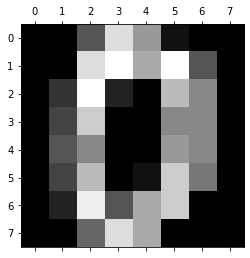

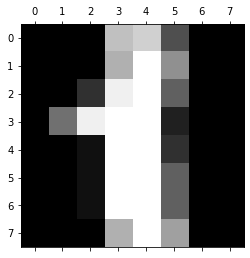

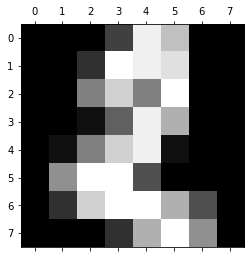

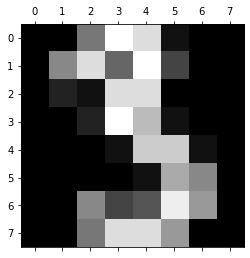

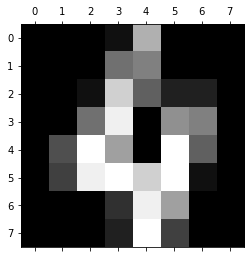

In [5]:
plt.gray()
for i in range(5): # memanggil urutan bisa menggunakan fo i in range
    plt.matshow(Digits.images[i])

In [6]:
Digits.target[0:5]

array([0, 1, 2, 3, 4])

In [7]:
from sklearn.model_selection import train_test_split 
# cara melakukan uji data

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(Digits.data,Digits.target, test_size=0.2)
# Jadi kita bisa melakukan test size 80% atau 20%. itu 0.2 itu 20%

In [9]:
len(X_train)

1437

In [10]:
len(X_test)

360

In [11]:
from sklearn.linear_model import LogisticRegression
items = LogisticRegression()

In [12]:
# kita melatihnya dengan kata fit
items.fit(X_train, Y_train)

D:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
items.score(X_test, Y_test) 
# Jadi akurasi ketepatan sekitar 91%

0.9555555555555556

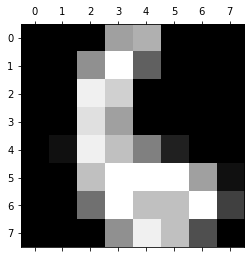

In [14]:
#kita akan melakukan sample acak
plt.matshow(Digits.images[66])

In [15]:
Digits.target[66]
# ternya itu gambar angka 6

6

In [16]:
items.predict([Digits.data[67]])
# ada cara terbaru jika terjadi error pada predict dengan double tanda kurung

array([6])

In [17]:
items.predict(Digits.data[0:5])

array([0, 1, 2, 3, 4])

In [18]:
y_predicted = items.predict(X_test)
from sklearn.metrics import confusion_matrix

cn = confusion_matrix(Y_test, y_predicted)
cn
# ini ketika kita ingin mengimpor ke matrics

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  1,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  1,  0,  1,  0],
       [ 0,  1,  0,  1,  0, 36,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 34,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  1,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 41]], dtype=int64)

Text(69.0, 0.5, 'Truth')

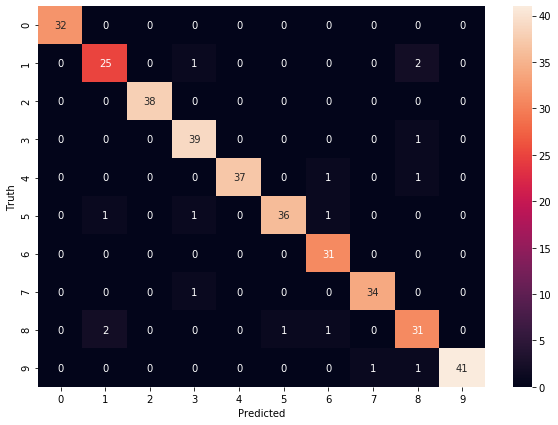

In [19]:
# Lalu kita akan men visualiasi metrics dengan seaborn
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
# Jadi disitu ada angka 38 maka ada kebenaran, dan angka 1 di bawah kiri merupakan kebenaran berupa 1 
# jadi ketika tidak ada angka 0 di garis terluar ini maka model anda, tidak berfungsi
# Inilah cara memvisualisasikan baik buruknya model anda